## Continuous Input and Continuous Output
When the output variable is continuous in nature we can fit a predictive regression model. It becomes necessary to eliminate the redundant variables while fitting a regression model as it would cause problems such as overfitting. A parsimonious model gives good predictions.

#### About the data: 

Consider the data set that concerns the hardening of cement. In particular, the researchers were interested in learning how the composition of the cement affected the heat evolved during the hardening of the cement. Therefore, they measured and recorded the following data on 13 batches of cement. Variables of this model were,
1. Response y: Heat evolved in calories during hardening of cement on a per gram basis
2. Predictor x1: % of tricalcium aluminate
3. Predictor x2: % of tricalcium silicate
4. Predictor x3: % of tetracalcium alumino ferrite
5. Predictor x4: % of dicalcium silicate

### a. Using pandas Pearson Correlation:

Correlation Coefficient (r) is a measure of linear association between the response and input variable. The basic idea is that input variables with a closer relation give more information or in statistical terms the variability in the response variable can be better explained by the model which higher r value. The value of this measure lies between +1 and -1.
- If the value is closer to +1 then it can be said there is a strong positive relation between response and input variable.
- If the value is closer to -1 then it can be said there is a strong negative relation between response and input variable.
- If the value is closer to 0 then it can be said there is a weak or no relation between response and input variable.


In [32]:
import statsmodels.api as sm       
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from tabulate import tabulate
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [33]:
cm = pd.read_excel('cement.xlsx')

<IPython.core.display.Javascript object>

In [20]:
cm.head()

,y,x1,x2,x3,x4
0,78.5,7,26,6,60
1,74.3,1,29,15,52
2,104.3,11,56,8,20
3,87.6,11,31,8,47
4,95.9,7,52,6,33


### Data Description

In [6]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       13 non-null     float64
 1   x1      13 non-null     int64  
 2   x2      13 non-null     int64  
 3   x3      13 non-null     int64  
 4   x4      13 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 648.0 bytes


In [7]:
cm.describe()

,y,x1,x2,x3,x4
count,13.000000,13.000000,13.000000,13.000000,13.00000
mean,95.423077,7.461538,48.153846,11.769231,30.00000
std,15.043723,5.882394,15.560881,6.405126,16.73818
min,72.500000,1.000000,26.000000,4.000000,6.00000
25%,83.800000,2.000000,31.000000,8.000000,20.00000
50%,95.900000,7.000000,52.000000,9.000000,26.00000
75%,109.200000,11.000000,56.000000,17.000000,44.00000
max,115.900000,21.000000,71.000000,23.000000,60.00000


<IPython.core.display.Javascript object>

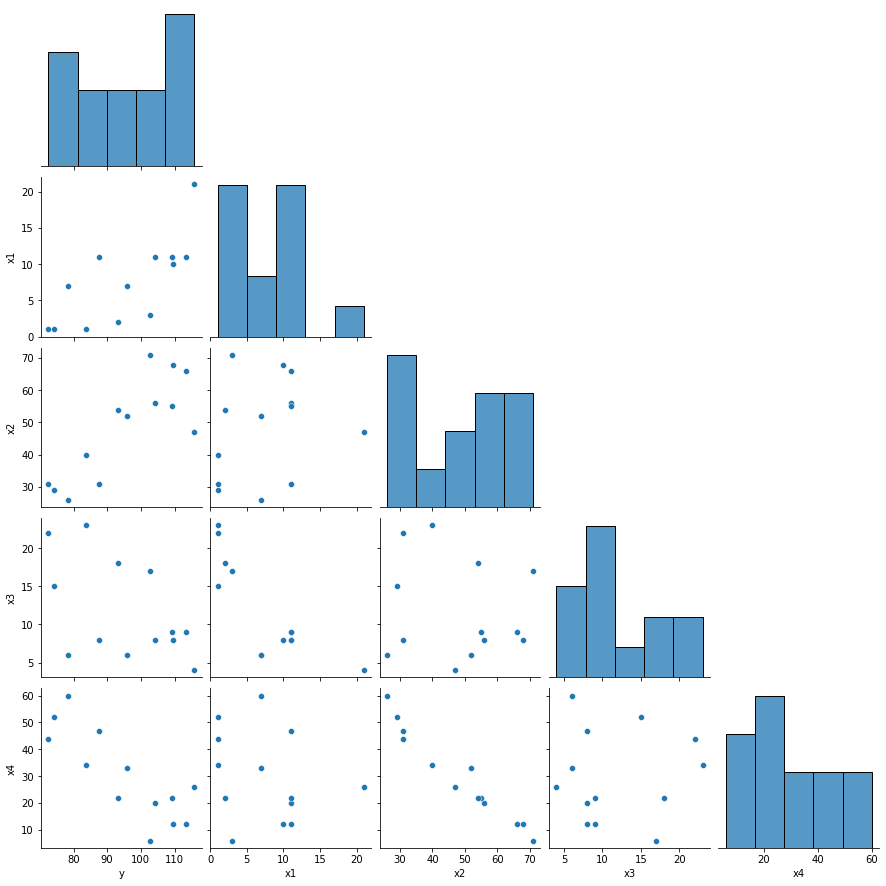

In [8]:
sns.pairplot(data = cm,corner = True)

### Correlation

In [34]:
corr = cm.corr()
corr

,y,x1,x2,x3,x4
y,1.000000,0.730717,0.816253,-0.534671,-0.821305
x1,0.730717,1.000000,0.228579,-0.824134,-0.245445
x2,0.816253,0.228579,1.000000,-0.139242,-0.972955
x3,-0.534671,-0.824134,-0.139242,1.000000,0.029537
x4,-0.821305,-0.245445,-0.972955,0.029537,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

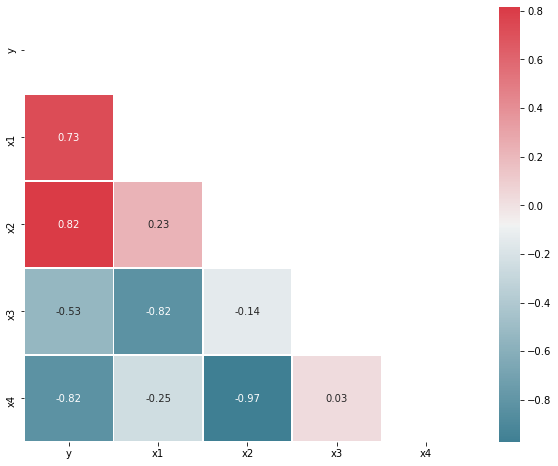

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr,cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)


##  a.	Using pandas Pearson Correlation:
### Selecting features with threshold as 0.5.
The code here s used to eliminate all features that have correlation coefficent less than 0.5

In [15]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(1):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) < 0.6:
            if columns[j]:
                columns[j] = False
selected_columns = cm.columns[columns]
selected_columns.shape

new_cm = cm[selected_columns]
new_cm.head()

<IPython.core.display.Javascript object>

,y,x1,x2,x4
0,78.5,7,26,60
1,74.3,1,29,52
2,104.3,11,56,20
3,87.6,11,31,47
4,95.9,7,52,33


## b. Using f regression() function from scikit-learn machine library

F_regression technique for feature selection in the sklearn feature selection module uses these principles:
1. A regressor of interest and the response variable is orthogonalized while other regressors are held constant to reduce the multicollinearity.
2. Correlation Coefficient is computed of this regressor of interest.
3. This will be used in computing of the F - score and then the p-value which will be returned.

Sklearn class selects features according to the k highest score. If there are more than one variables, the same is done considering one variable at a time.



In [7]:
def featureSelection(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [9]:
y = cm.iloc[:, 0]
X = cm.iloc[:,1:]

labels = ['x1','x2','x3','x4']

#Training the model
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# feature selection
X_train_fs, X_test_fs, fs = featureSelection(x_train, y_train, x_test)

#printing the f scores
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (labels[i], fs.scores_[i]))


Feature x1: 16.816191
Feature x2: 17.049731
Feature x3: 9.871595
Feature x4: 20.187038


## Building a Regression Model
First we split the dataset to train and test set. 20% of the data is used to create the test data and 80% to create the train data

### Building the model with selected features

In [67]:
y = new_cm.iloc[:, 0]
X = new_cm.iloc[:,1:]

#Training the model
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
model = LinearRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
model.score(x_test,y_test)

#Getting Results
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1-r2)*(len(y_train)-1))/(len(y_train)-X.shape[1]-1)
    
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('Adjusted R2: ',round(adj_r2,4))
    
    res1 = [round(explained_variance,3),round(mean_absolute_error,2),round(mse,2),round(mean_squared_log_error,2),round(median_absolute_error,2),round(r2,2),round(adj_r2,2)]
    return res1
result1 = regression_results(y_test,prediction)

explained_variance:  0.9758
mean_squared_log_error:  0.0005
r2:  0.9612
MAE:  2.2027
MSE:  5.4078


<IPython.core.display.Javascript object>

RMSE:  2.3255
Adjusted R2:  0.9418


### Building the regression model with all features

In [77]:
y = cm.iloc[:, 0]
X = cm.iloc[:,1:]

#Training the Model
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
model = LinearRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
model.score(x_test,y_test)

#Getting Results
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
   # 1 – [(1-R2)*(n-1)/(n-k-1)]
    adj_r2 = 1 - ((1-r2)*(len(y_train)-1))/(len(y_train)-X.shape[1]-1)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('Adjusted R2 ',round(adj_r2,2))
    res2 = [round(explained_variance,2),round(mean_absolute_error,2),round(mse,2),round(mean_squared_log_error,2),round(median_absolute_error,2),round(r2,2),round(adj_r2,2)]
    return res2

result2 = regression_results(y_test,prediction)
result2

explained_variance:  0.9495
mean_squared_log_error:  0.0005
r2:  0.9363
MAE:  2.2735
MSE:  5.4611


<IPython.core.display.Javascript object>

RMSE:  2.3369
Adjusted R2  0.89


[0.95, 2.27, 5.46, 0.0, 1.97, 0.94, 0.89]

In [78]:
print(" ------------------------------------------------------------------------------------- ")
print(tabulate({"" : ["Explained Varinace","Mean Absolute Error","Mean Square Error","Median Absolute Error","Mean Squared Log Error","R2","Adjusted R2"],
                "Model With Selected Features" : [result1[0],result1[1],result1[2],result1[3],result1[4],result1[5],result1[6]],
                "Model With All Features" : [result2[0],result2[1],result2[2],result2[3],result2[4],result2[5],result2[6]]
        },headers = "keys",tablefmt = 'github'))

 ------------------------------------------------------------------------------------- 
|                        |   Model With Selected Features |   Model With All Features |
|------------------------|--------------------------------|---------------------------|
| Explained Varinace     |                          0.976 |                      0.95 |
| Mean Absolute Error    |                          2.2   |                      2.27 |
| Mean Square Error      |                          5.41  |                      5.46 |
| Median Absolute Error  |                          0     |                      0    |
| Mean Squared Log Error |                          2.55  |                      1.97 |
| R2                     |                          0.96  |                      0.94 |
| Adjusted R2            |                          0.94  |                      0.89 |
